In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

plt.style.use("dark_background")


# Import data

* https://fred.stlouisfed.org

In [2]:
from fredapi import Fred
key='###########'

fred = Fred(api_key=key)

data={}
codes={'Inflation': 'CPIAUCSL','WTI': 'WTISPLC','Unemployment':'UNRATE','Financial Condition': 'NFCI','Capacity':'MCUMFN','Infl Expectations': 'MICH','Retail Confidence':'CSCICP03USM665S','Manufacturing confidence':'BSCICP03USM665S'}

for i in codes.values():
    data[i]=fred.get_series(i)

In [3]:
df=pd.DataFrame.from_dict(data).ffill().resample('MS').ffill().dropna()
df.columns=codes.keys()
df[['Inflation','WTI','Unemployment','Capacity']]=df[['Inflation','WTI','Unemployment','Capacity']].pct_change(12)*100
df.dropna(inplace=True)
display(df)

,Inflation,WTI,Unemployment,Financial Condition,Capacity,Infl Expectations,Retail Confidence,Manufacturing confidence
1979-01-01,9.250399,0.000000,-7.812500,1.69868,3.887369,7.8,98.089455,101.262211
1979-02-01,9.841270,6.734007,-6.349206,1.20346,3.815607,9.3,98.073259,101.104599
1979-03-01,10.252366,6.734007,-7.936508,0.73280,2.483289,8.8,97.871177,100.908109
1979-04-01,10.485133,6.734007,-4.918033,0.40519,-0.768489,9.7,97.663798,100.615687
1979-05-01,10.697674,21.885522,-6.666667,0.39891,0.099239,9.8,97.525271,100.251951
...,...,...,...,...,...,...,...,...
2022-05-01,8.516413,68.098818,-37.931034,-0.33287,3.307433,5.3,96.369892,100.387736
2022-06-01,8.995221,60.885402,-38.983051,-0.24678,2.623263,5.3,95.940128,100.108881
2022-07-01,8.482130,40.184853,-35.185185,-0.14642,2.002722,5.2,95.900477,99.924482
2022-08-01,8.249235,38.299129,-28.846154,-0.17502,2.329436,5.2,96.177060,99.809795


In [4]:
forecast_windows=6
df['Ahead Inflation']=df['Inflation'].shift(-forecast_windows)
df

,Inflation,WTI,Unemployment,Financial Condition,Capacity,Infl Expectations,Retail Confidence,Manufacturing confidence,Ahead Inflation
1979-01-01,9.250399,0.000000,-7.812500,1.69868,3.887369,7.8,98.089455,101.262211,11.450382
1979-02-01,9.841270,6.734007,-6.349206,1.20346,3.815607,9.3,98.073259,101.104599,11.836115
1979-03-01,10.252366,6.734007,-7.936508,0.73280,2.483289,8.8,97.871177,100.908109,11.879699
1979-04-01,10.485133,6.734007,-4.918033,0.40519,-0.768489,9.7,97.663798,100.615687,12.071535
1979-05-01,10.697674,21.885522,-6.666667,0.39891,0.099239,9.8,97.525271,100.251951,12.592593
...,...,...,...,...,...,...,...,...,...
2022-05-01,8.516413,68.098818,-37.931034,-0.33287,3.307433,5.3,96.369892,100.387736,NaN
2022-06-01,8.995221,60.885402,-38.983051,-0.24678,2.623263,5.3,95.940128,100.108881,NaN
2022-07-01,8.482130,40.184853,-35.185185,-0.14642,2.002722,5.2,95.900477,99.924482,NaN
2022-08-01,8.249235,38.299129,-28.846154,-0.17502,2.329436,5.2,96.177060,99.809795,NaN


#  Data Cleaning

In [5]:
split_date='2010-01-01'
df_train=df[df.index < split_date]
df_test=df[df.index > split_date]
split_date=df_train.index[-1]
split_date

Timestamp('2009-12-01 00:00:00', freq='MS')

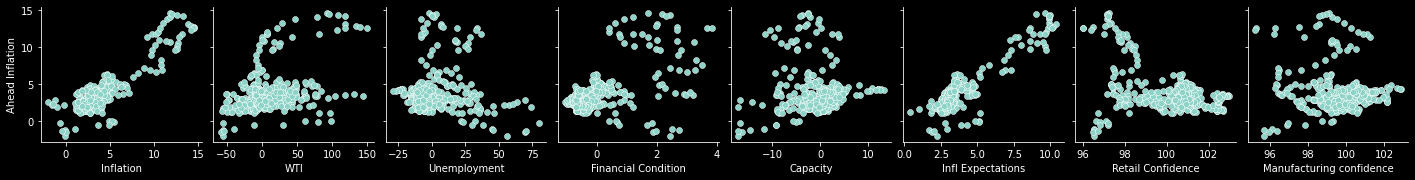

In [6]:
sns.pairplot(data=df_train,x_vars=df.columns[:-1],y_vars=df.columns[-1])

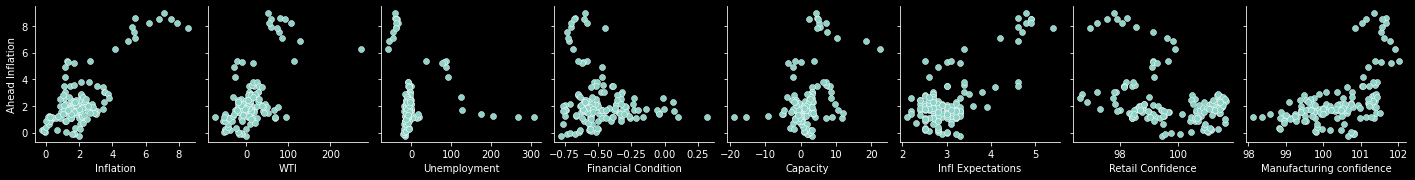

In [7]:
sns.pairplot(data=df_test,x_vars=df.columns[:-1],y_vars=df.columns[-1])

In [8]:
from xgboost import  XGBRegressor

In [9]:
import itertools
parameters={'random_state': [100],'lambda':[1,2,3],'max_depth': [4,5,6],'n_estimators': [50,100,200],'eta':[0.1,0.2,0.3]}
parameters_=list((dict(zip(parameters, x)) for x in itertools.product(*parameters.values())))

In [10]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import explained_variance_score

from sklearn.metrics import r2_score

acc=[]
accuracy=[]
for param in parameters_:
    tscv = TimeSeriesSplit(n_splits=10)
    model = XGBRegressor(**param)
    for train_index, test_index in tscv.split(df_train):
        X_train, X_test = df_train.iloc[train_index,:-1], df_train.iloc[test_index,:-1]
        y_train, y_test = df_train.iloc[train_index,-1], df_train.iloc[test_index,-1]
        model.fit(X_train, y_train)
        
        y_pr = model.predict(X_test)

        # scoring
        acc.append(r2_score(y_test,y_pr))
    accuracy.append(np.mean(acc))

best_param = parameters_[np.argmax(accuracy)]
best_param

{'random_state': 100,
 'lambda': 1,
 'max_depth': 4,
 'n_estimators': 50,
 'eta': 0.1}

# Model Evaluation

In [11]:
X,y=df_test.iloc[:,:-1],df_test.iloc[:,-1] 
predicted=[]
roll=12
imp=[]
for i in range(roll+forecast_windows,len(df_test)):
    model = XGBRegressor(**best_param)

    X_fit = X.iloc[i-roll-forecast_windows:i-forecast_windows]
    y_fit = y.iloc[i-roll-forecast_windows:i-forecast_windows]

    model = model.fit(X_fit, y_fit)
    imp.append(model.feature_importances_)
    X_predict = X.iloc[i:i+ 1]
    y_pred = model.predict(X_predict)
    predicted.append(y_pred)
    

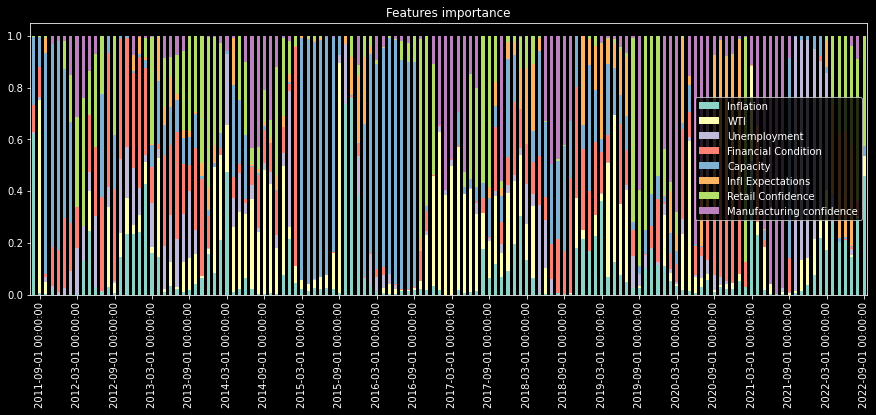

In [12]:
import matplotlib.dates as mdates
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
pd.DataFrame(imp,columns=X.columns,index=X.index[roll+forecast_windows:]).plot.bar(stacked=True,figsize=(15,5),ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.title('Features importance')
plt.show()

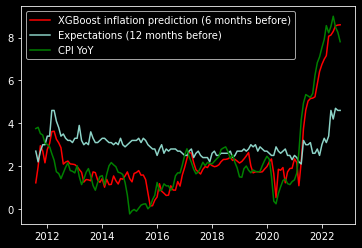

In [13]:
predicted_df=pd.DataFrame(predicted,index=df_test.iloc[forecast_windows+roll:].index)
plt.plot(predicted_df,label='XGBoost inflation prediction (6 months before)',color='red')
plt.plot(df_test['Infl Expectations'].shift(12).iloc[roll+forecast_windows:],label='Expectations (12 months before)')
plt.plot(df_test['Inflation'].iloc[roll+forecast_windows:],label='CPI YoY',color='green')
plt.legend()
plt.show()

In [14]:
y_actual=df.loc[df_test.index]['Inflation'].iloc[roll+forecast_windows:].ffill()

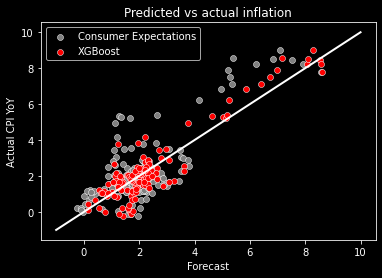

In [15]:
sns.scatterplot(x=df_test['Inflation'],y=df_test['Ahead Inflation'],label='Consumer Expectations',color='gray')
sns.scatterplot(x=predicted_df.iloc[:,0],y=y_actual,label='XGBoost',color='red')
plt.plot([-1, 10], [-1, 10], linewidth=2,color='white')
plt.xlabel('Forecast')
plt.ylabel('Actual CPI YoY')

plt.title('Predicted vs actual inflation')
plt.show()

In [16]:
print('Explained Variance: ', "{:.2%}".format(explained_variance_score(y_actual,predicted_df)))

print('R2: ', "{:.2%}".format(r2_score(y_actual,predicted_df)))

from sklearn.metrics import mean_absolute_error
print('Mean Abs Error: ', "{:.2%}".format(mean_absolute_error(y_actual,predicted_df)/100))

from sklearn.metrics import mean_squared_error
print('RMSE: ', "{:.2%}".format(mean_squared_error(y_actual,predicted_df,squared=False)/100))

from sklearn.metrics import max_error
print('Max Error: ', "{:.2%}".format(max_error(y_actual,predicted_df)/100))



Explained Variance:  85.89%
R2:  85.88%
Mean Abs Error:  0.58%
RMSE:  0.76%
Max Error:  2.53%


In [17]:
model = XGBRegressor(**best_param)

X_fit = df.iloc[-forecast_windows-roll:-forecast_windows,:-1]
y_fit = df.iloc[-forecast_windows-roll:-forecast_windows,-1].ffill()

model = model.fit(X_fit, y_fit)

y_pred = model.predict(np.array(df.iloc[-6:,:-1]))

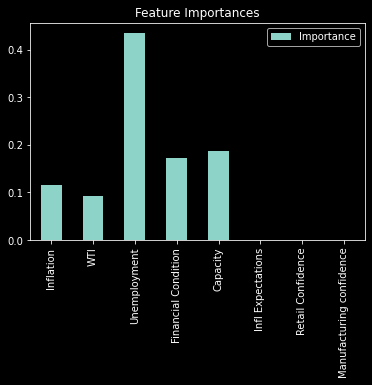

In [18]:
pd.DataFrame(model.feature_importances_,X.columns,['Importance']).plot.bar()
plt.title('Feature Importances')
plt.show()

In [19]:
print('Expected inflation in march 2023: ', "{:.2%}".format(y_pred[-1]/100))

Expected inflation in march 2023:  8.59%


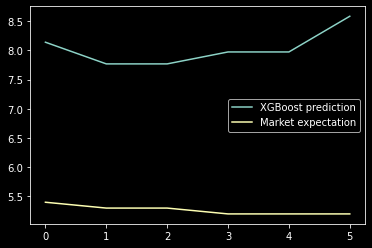

In [166]:
pd.DataFrame(y_pred,columns=['XGBoost prediction']).plot()
plt.plot(df['Infl Expectations'].iloc[-6:].reset_index().drop('index',axis=1),label='Market expectation')
plt.legend()
plt.show()